## <div style="text-align: center;">Complex NetworkAnalysis - Assignment 5</div>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### 1. Visualize Karate club graph

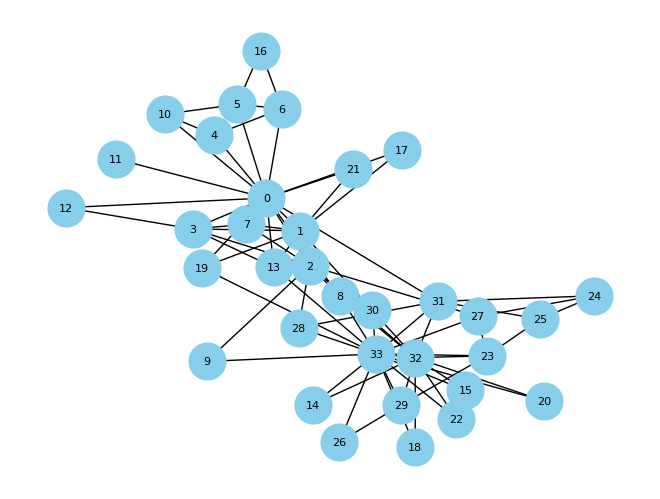

In [2]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8)

### 2. Find the edge betweenness of each edge of the karate club graph
#### Helper method to run the code multiple times for finding edge and removing the nodes with max betweenness, another method will visualize the nodes based on partition.

In [3]:
#method to calculate the edge betweeness
def calculate_edge_betweenness(graph):
    edge_betweenness = nx.edge_betweenness_centrality(graph)

    # iterate and print the edge betweeness centrality for each edges
    for edge, betweenness in edge_betweenness.items():
        print(f"Edge {edge}: Betweenness Centrality = {betweenness}")

#method to draw the graph with partition, this will dispaly community nodes with different color
def draw_graph_with_partition(graph):
    
    # Detects communities in the graph using label propagation algorithm.
    communities = list(nx.community.label_propagation.label_propagation_communities(graph))

    print(communities)   
    node_colors = {}
    for i, community in enumerate(communities):
        for node in community:
            node_colors[node] = i

    # Visualize the partitioned graph
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 8))
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color=[node_colors[node] for node in graph.nodes()], cmap=plt.cm.tab10)
    plt.show()

#method to remove the edge with high betweeness
def remove_edge_with_high_betweenness(graph):
    
    # Calculate edge betweenness centrality
    edge_betweenness = nx.edge_betweenness_centrality(graph)    
    max_betweenness_edge = max(edge_betweenness, key=edge_betweenness.get)

    # Print information about the edge to be removed
    print(f"Removing edge {max_betweenness_edge} with highest betweenness centrality")

    # we will unpack (*) the tuple and pass this to remove_edge method
    graph.remove_edge(*max_betweenness_edge)

### 2.a. Calculate the edge betweenness centrality for every edge for the Karate club graph displayed above

In [4]:
calculate_edge_betweenness(G)

Edge (0, 1): Betweenness Centrality = 0.025252525252525245
Edge (0, 2): Betweenness Centrality = 0.0777876807288572
Edge (0, 3): Betweenness Centrality = 0.02049910873440285
Edge (0, 4): Betweenness Centrality = 0.0522875816993464
Edge (0, 5): Betweenness Centrality = 0.07813428401663694
Edge (0, 6): Betweenness Centrality = 0.07813428401663695
Edge (0, 7): Betweenness Centrality = 0.0228206434088787
Edge (0, 8): Betweenness Centrality = 0.07423959482783014
Edge (0, 10): Betweenness Centrality = 0.0522875816993464
Edge (0, 11): Betweenness Centrality = 0.058823529411764705
Edge (0, 12): Betweenness Centrality = 0.04652406417112298
Edge (0, 13): Betweenness Centrality = 0.04237189825425121
Edge (0, 17): Betweenness Centrality = 0.04012392835922248
Edge (0, 19): Betweenness Centrality = 0.045936960642843
Edge (0, 21): Betweenness Centrality = 0.040123928359222474
Edge (0, 31): Betweenness Centrality = 0.1272599949070537
Edge (1, 2): Betweenness Centrality = 0.023232323232323233
Edge (1, 

### 2.b. Remove the edge with the highest betweenness centrality.

Removing edge (2, 32) with highest betweenness centrality
[{0, 1, 2, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21}, {16, 5, 6}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]


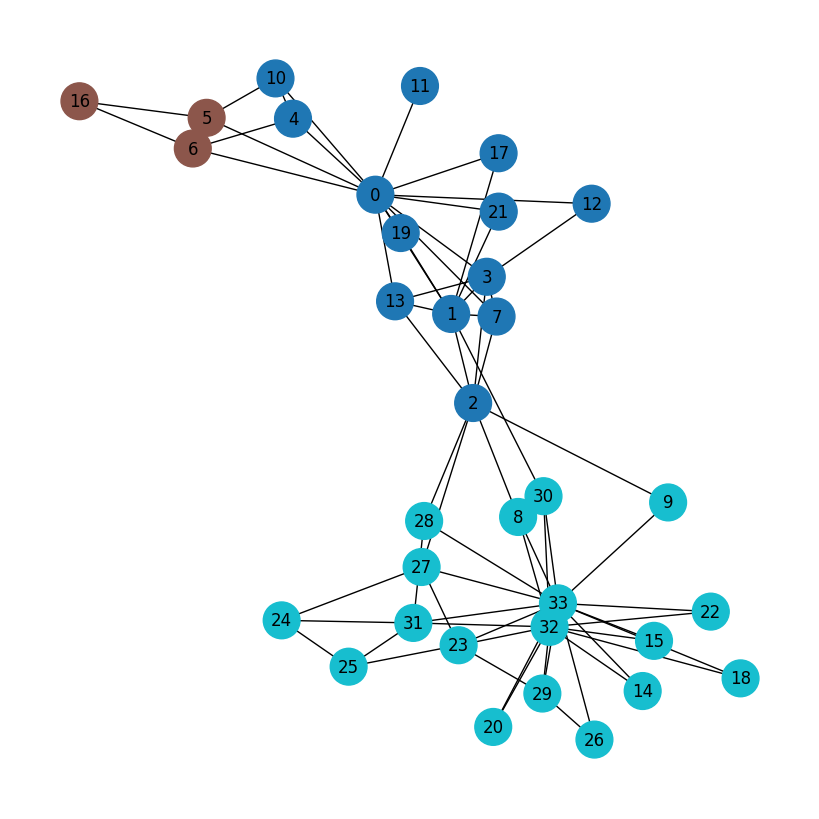

Removing edge (1, 30) with highest betweenness centrality
[{0, 1, 2, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21}, {16, 5, 6}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]


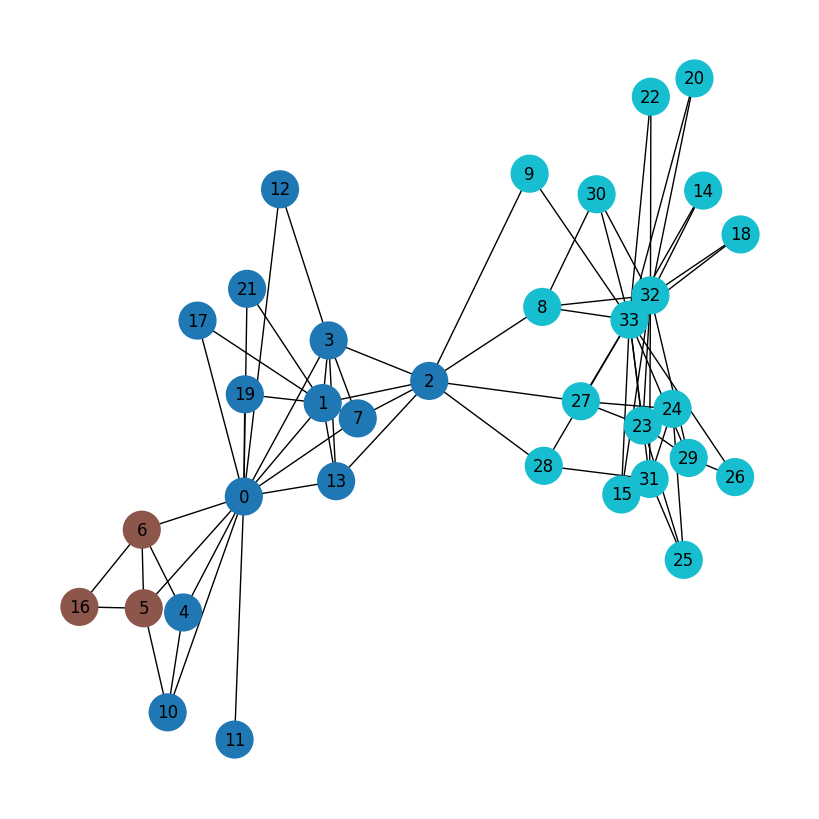

Removing edge (1, 2) with highest betweenness centrality
[{0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}, {16, 5, 6}]


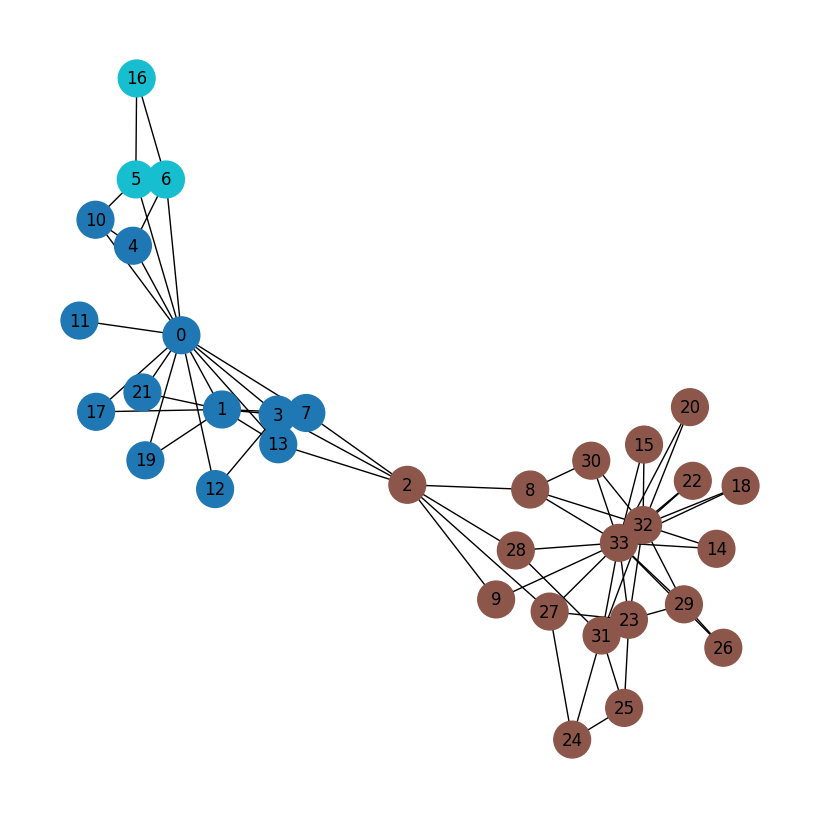

In [11]:
num_partitions = 3
for _ in range(num_partitions):
    remove_edge_with_high_betweenness(G)
    draw_graph_with_partition(G)

In [8]:
calculate_edge_betweenness(G)

Edge (0, 1): Betweenness Centrality = 0.029010695187165772
Edge (0, 3): Betweenness Centrality = 0.024257278669043366
Edge (0, 4): Betweenness Centrality = 0.0522875816993464
Edge (0, 5): Betweenness Centrality = 0.07813428401663694
Edge (0, 6): Betweenness Centrality = 0.07813428401663694
Edge (0, 7): Betweenness Centrality = 0.026387501387501382
Edge (0, 8): Betweenness Centrality = 0.13782067605597018
Edge (0, 10): Betweenness Centrality = 0.0522875816993464
Edge (0, 11): Betweenness Centrality = 0.058823529411764705
Edge (0, 12): Betweenness Centrality = 0.03715304303539596
Edge (0, 13): Betweenness Centrality = 0.07645491763138822
Edge (0, 17): Betweenness Centrality = 0.029734317969612078
Edge (0, 19): Betweenness Centrality = 0.07076567223626047
Edge (0, 21): Betweenness Centrality = 0.029734317969612085
Edge (1, 2): Betweenness Centrality = 0.04866750896162661
Edge (1, 3): Betweenness Centrality = 0.0077243018419489
Edge (1, 7): Betweenness Centrality = 0.007477816301345713
Edg

### 3. Create a random graph using GNM model.

#### Apply girvan-newmann algorithm to form ‘K’ partitions. N, M, and ‘K’ are input parameters.

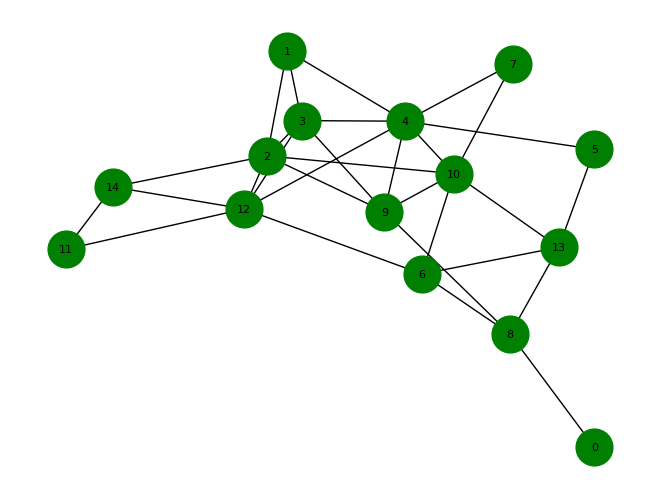

In [21]:
N = 15 #no of nodes
M = 30 #no of edges
random_G=nx.gnm_random_graph(N,M)

pos = nx.spring_layout(random_G) 
nx.draw(random_G, pos, with_labels=True, node_size=700, node_color='Green', font_size=8)

####  Output : K partitions in the form of lists

In [48]:
K = 5 # number of parition
# Apply Girvan-Newman algorithm to form K partitions
communities_generator = nx.community.girvan_newman(random_G)
for _ in range(K - 1):
    partitions = next(communities_generator)
print(list(partitions))

[{0}, {1}, {2, 11, 12, 14}, {3, 4, 7, 9, 10}, {8, 13, 5, 6}]


####  Color each of the partitions’ nodes with different colors and visualize

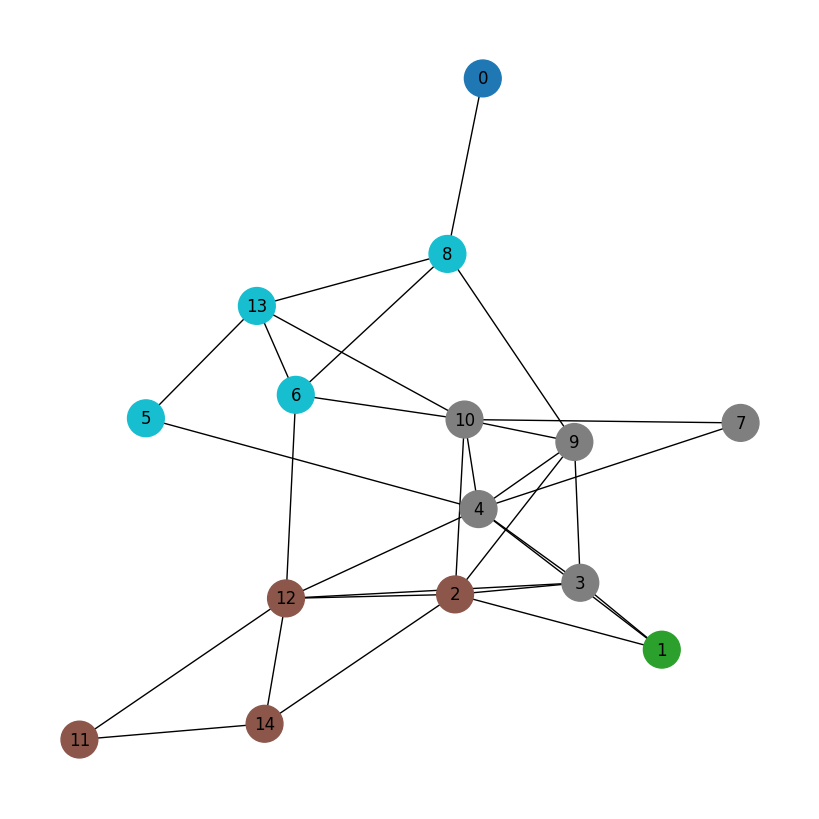

In [49]:
node_colors = {}
for i, partition in enumerate(partitions):
    for node in partition:
        node_colors[node] = i

# Visualize the partitioned graph
pos = nx.spring_layout(random_G)
plt.figure(figsize=(8, 8))
nx.draw(random_G, pos, with_labels=True, node_size=700, node_color=[node_colors[node] for node in random_G.nodes()], cmap=plt.cm.tab10)
plt.show()